In [1]:
import pandas as pd

hittak = pd.read_csv('../raw/osaka_2021hittakuri.csv')
u_list = hittak["発生場所"].unique()
print("一意のリスト\n", u_list)
print(f'{hittak.dtypes} \n')
display(hittak.tail(10))

一意のリスト
 ['道路上' 'その他']
罪名                object
手口                object
管轄警察署（発生地）        object
管轄交番・駐在所（発生地）     object
市区町村コード（発生地）     float64
都道府県（発生地）         object
市区町村（発生地）         object
町丁目（発生地）          object
発生年月日（始期）         object
発生時（始期）            int64
発生場所              object
被害者の性別            object
被害者の年齢            object
現金被害の有無           object
dtype: object 



,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,被害者の性別,被害者の年齢,現金被害の有無
90,窃盗,ひったくり,布施,長瀬駅前交番,272272.0,大阪府,東大阪市,横沼町３丁目,2021-10-11,11,道路上,女性,70歳以上,あり
91,窃盗,ひったくり,枚方,枚方公園前交番,272108.0,大阪府,枚方市,山之上西町,2021-10-19,0,道路上,女性,20歳代,あり
92,窃盗,ひったくり,寝屋川,高柳交番,272159.0,大阪府,寝屋川市,池田３丁目,2021-03-27,23,道路上,女性,10歳代,あり
93,窃盗,ひったくり,四條畷,住道交番,272183.0,大阪府,大東市,赤井１丁目,2021-06-20,19,道路上,男性,70歳以上,あり
94,窃盗,ひったくり,守口,守口駅前交番,272094.0,大阪府,守口市,寺内町２丁目,2021-11-06,9,道路上,女性,70歳以上,あり
95,窃盗,ひったくり,門真,二島交番,272230.0,大阪府,門真市,三ツ島１丁目,2021-06-20,20,道路上,男性,40歳代,あり
96,窃盗,ひったくり,北堺,中百舌鳥交番,271462.0,大阪府,堺市北区,百舌鳥梅北町４丁,2021-08-13,13,道路上,女性,20歳代,あり
97,窃盗,ひったくり,北堺,新金岡交番,271462.0,大阪府,堺市北区,新金岡町５丁,2021-02-01,21,道路上,男性,30歳代,あり
98,窃盗,ひったくり,北堺,東浅香山町交番,271462.0,大阪府,堺市北区,北花田町３丁,2021-12-11,20,道路上,女性,50歳代,あり
99,窃盗,ひったくり,北堺,浅香山交番,271462.0,大阪府,堺市北区,東浅香山町２丁,2021-12-23,19,道路上,女性,60-64歳,あり


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

sns.set_theme(font_scale=1.5, font='IPAexGothic')
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [3]:
# 被害者の年齢を世代別にする
hittak['被害者の年齢'] = pd.Categorical(hittak['被害者の年齢'], ['70歳以上','65-69歳', '60-64歳', '50歳代', '40歳代', '30歳代', '20歳代' ,'10歳代'])

<AxesSubplot:xlabel='count', ylabel='市区町村（発生地）'>

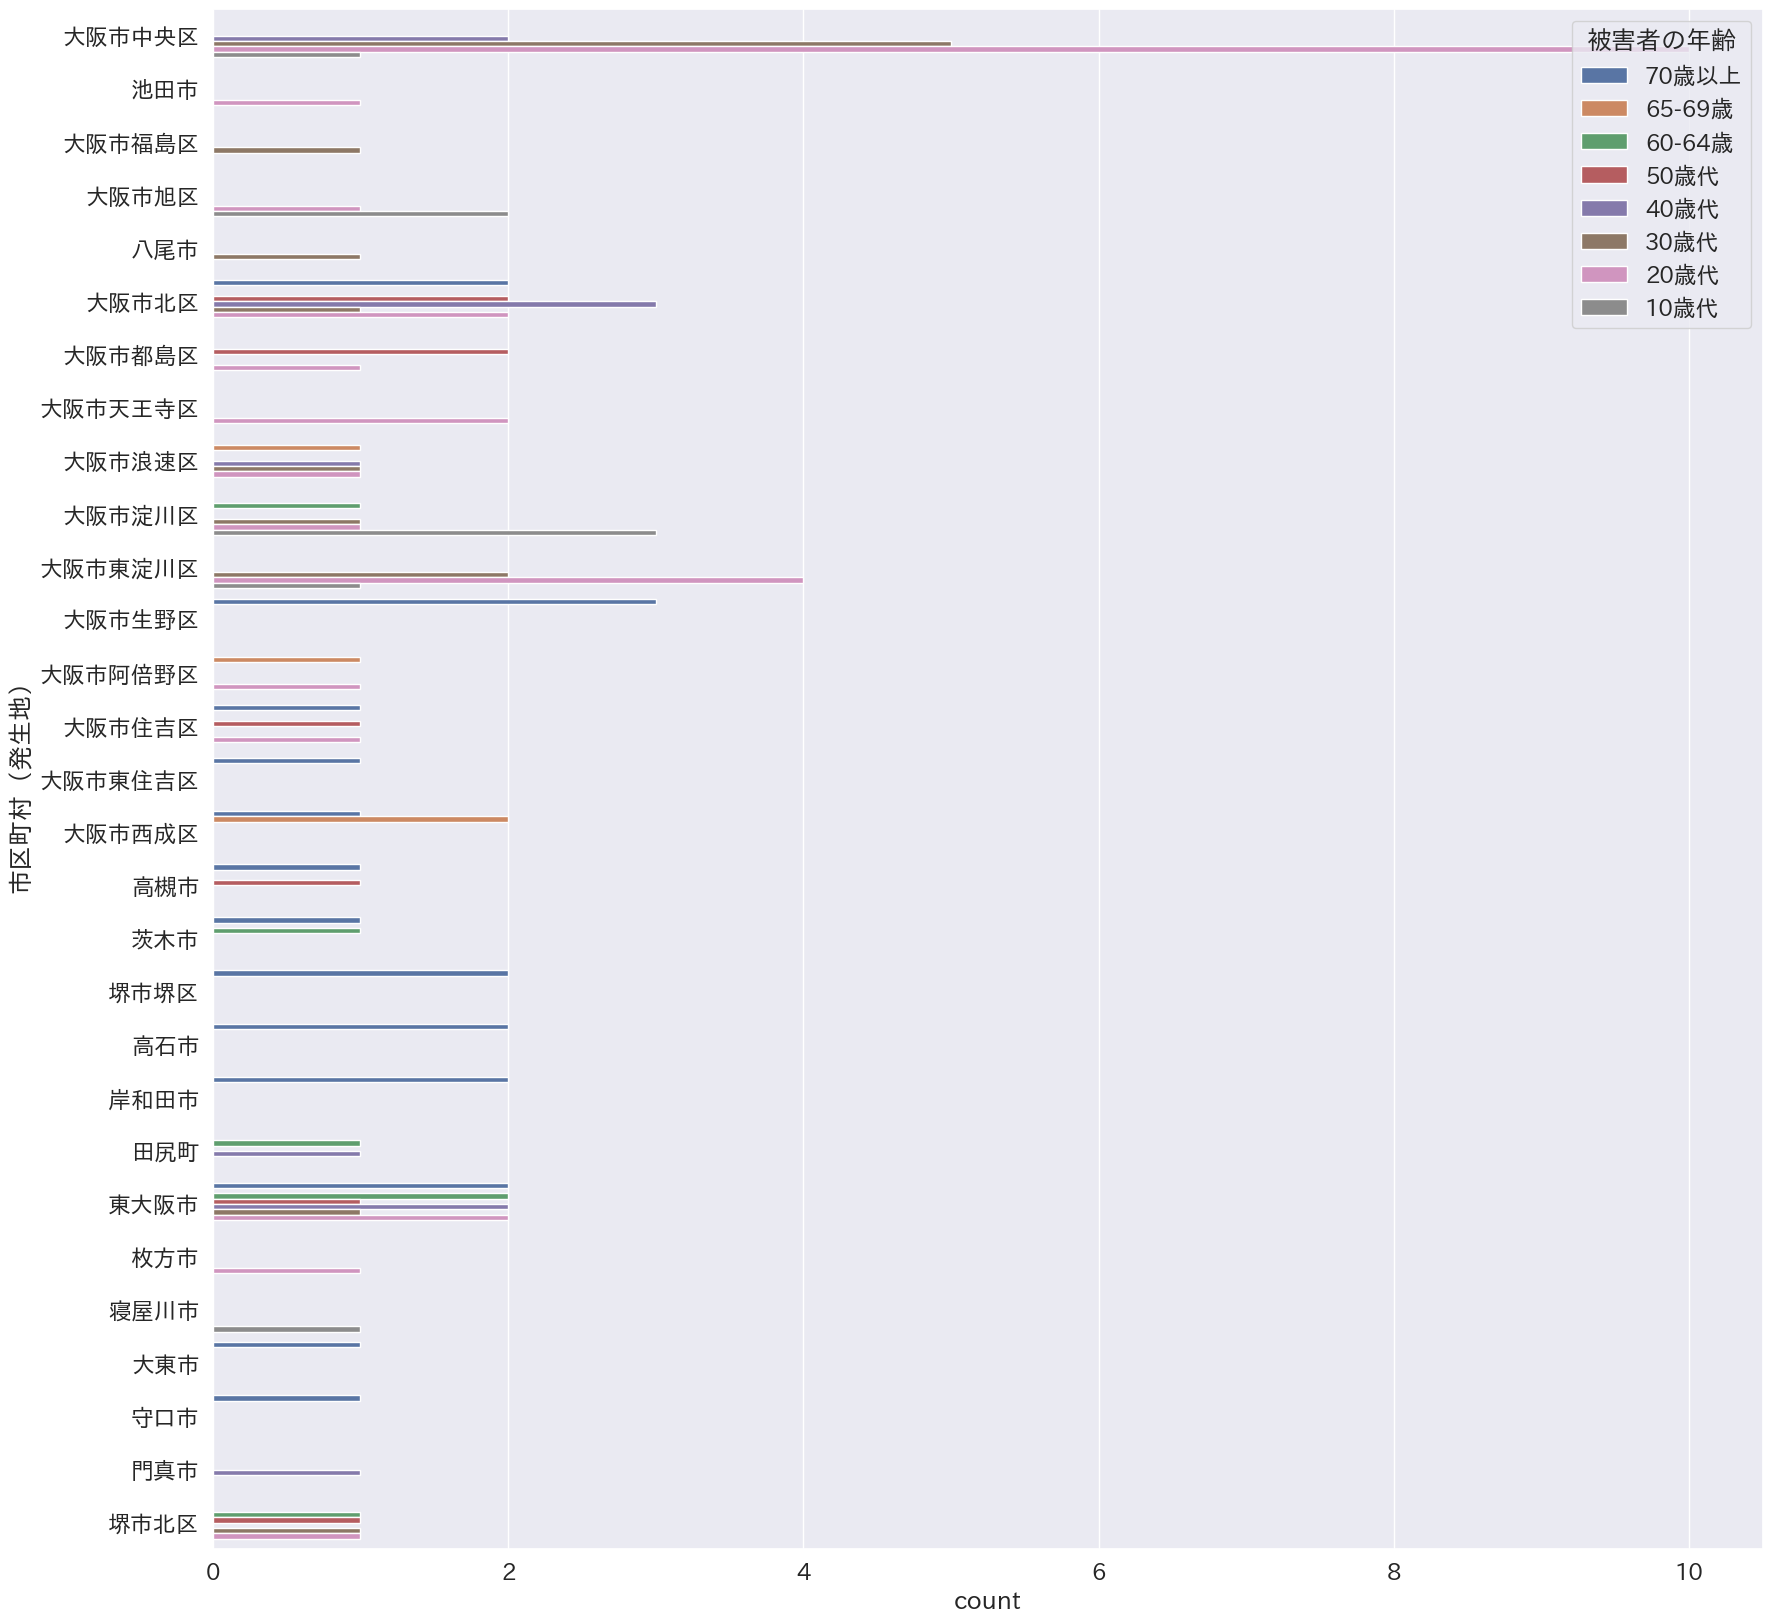

In [4]:
plt.figure(figsize=(20,20))
sns.countplot(y=hittak['市区町村（発生地）'], hue=hittak['被害者の年齢'])

<AxesSubplot:xlabel='count', ylabel='被害者の年齢'>

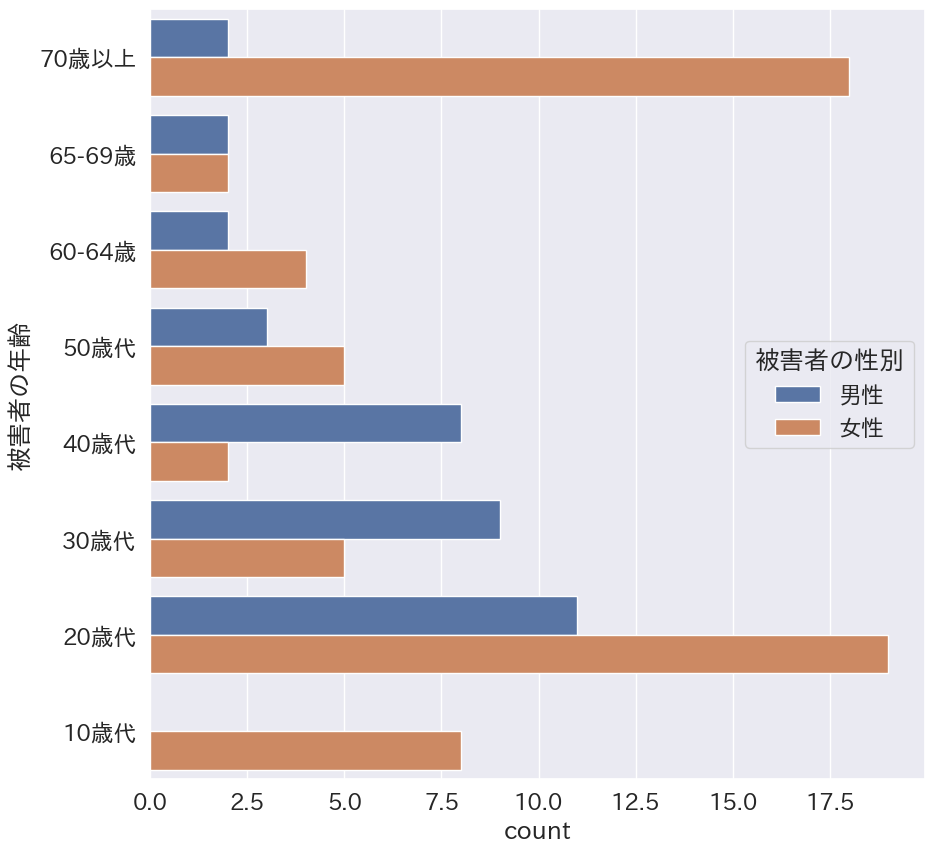

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(data=hittak, y="被害者の年齢", hue="被害者の性別")

<AxesSubplot:xlabel='count', ylabel='発生時（始期）'>

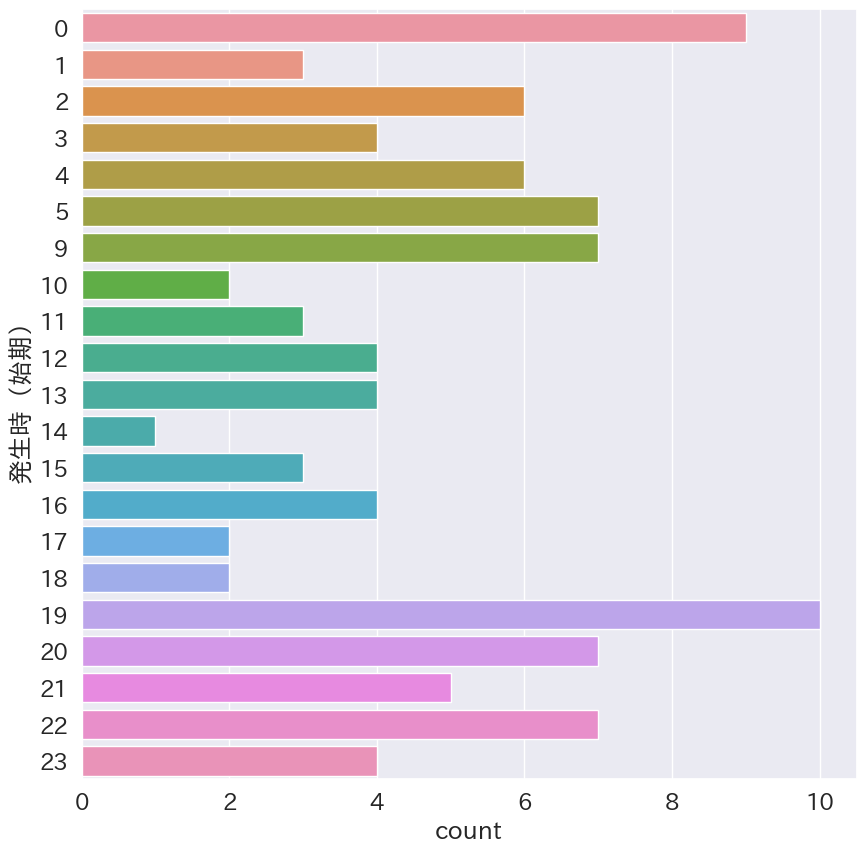

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(data=hittak, y="発生時（始期）")

In [7]:
hittak_time = pd.read_csv('../CleansedFiles/hittak_map.csv')
display(hittak_time.head(5))

,被害者の年齢,被害者の性別,市区町村（発生地）,発生時（始期）
0,30歳代,女性,大阪市東淀川区,0
1,30歳代,女性,大阪市北区,0
2,50歳代,男性,大阪市都島区,0
3,20歳代,女性,東大阪市,0
4,20歳代,女性,東大阪市,0


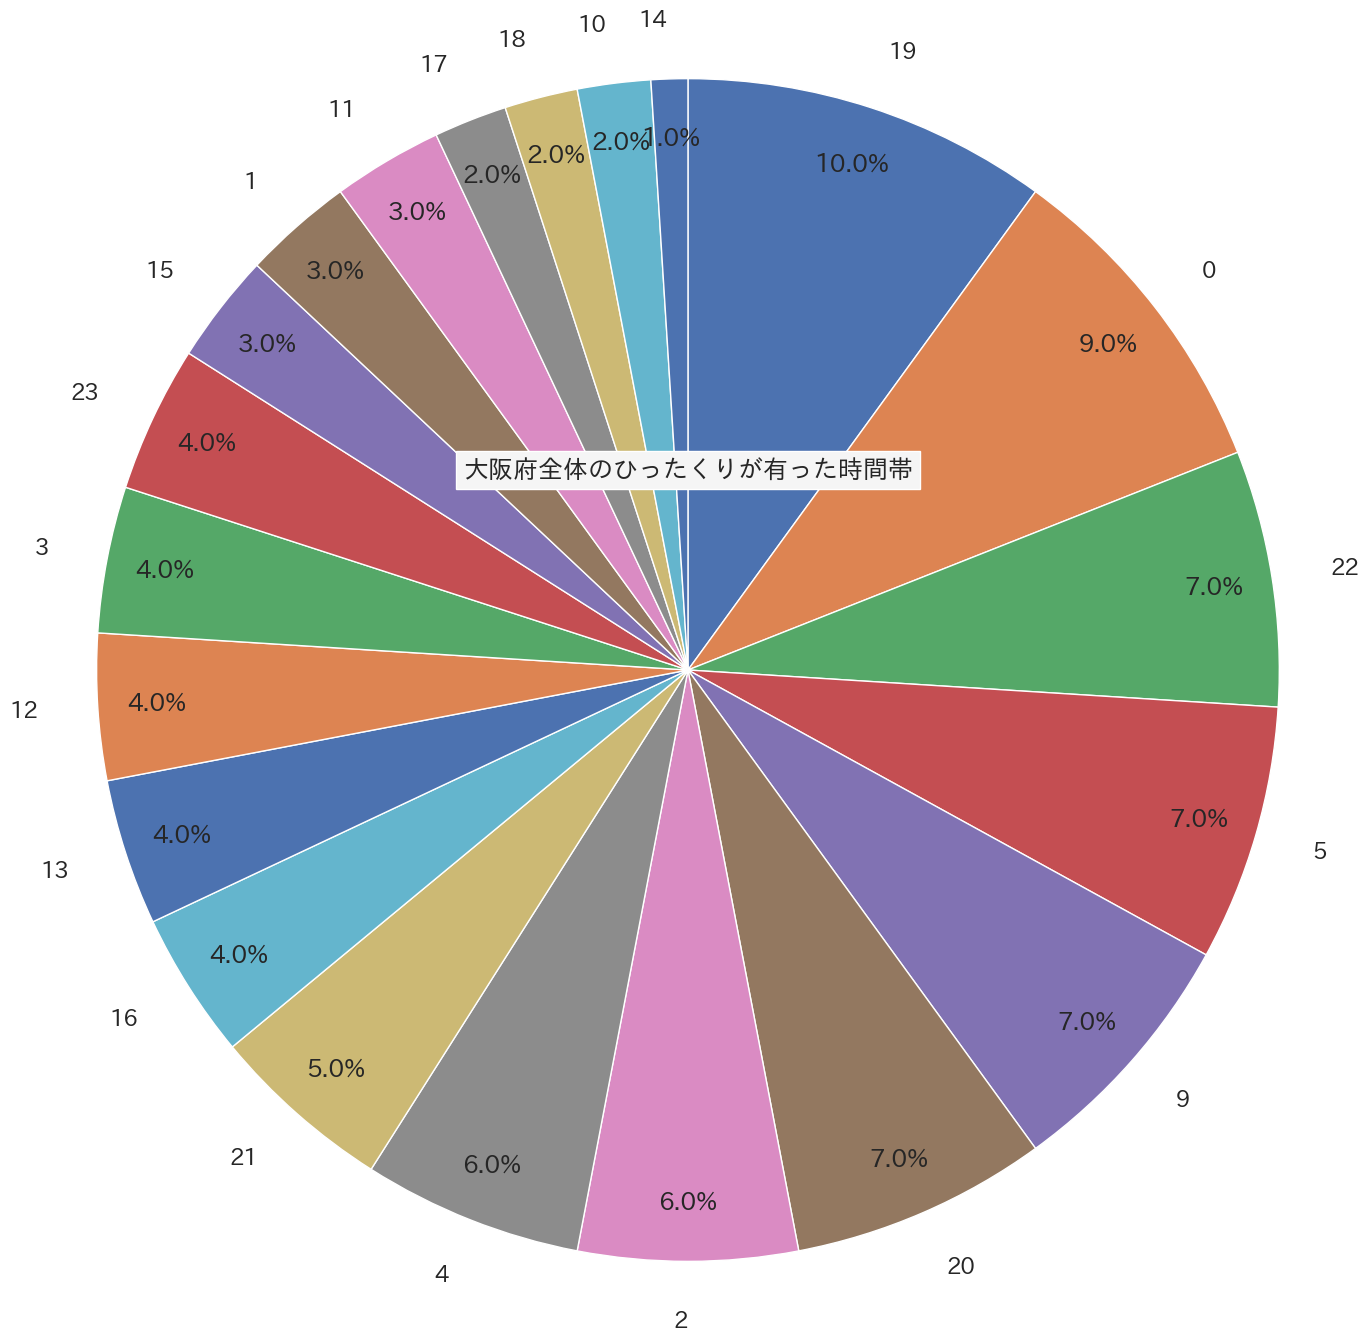

In [8]:
# hittak = hittak.reindex(index=['0','1','2','3', '4', '5', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
# display(hittak.head(5))
# u_list = hittak['発生時（始期）'].unique()
# print("一意のリスト\n", u_list)
# hittak['発生時（始期）'] = pd.Categorical(hittak['発生時（始期）'], ['0','1','2','3', '4', '5', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
hittak_time['発生時（始期）'].value_counts().plot.pie(counterclock = False, autopct = '%1.1f%%', pctdistance=.9, startangle = 90, radius=4)
plt.title("大阪府全体のひったくりが有った時間帯", bbox={'facecolor':'whitesmoke', 'pad':5})
plt.show()

In [9]:
age = pd.get_dummies(hittak['被害者の年齢'])
display(hittak.head(5))
# データの形を表示(行数・列数を取得)
print(f'hittak : {hittak.shape}\n')

#先頭5つを可視化
display(hittak.head(5))

# 各columnのデータ型を表示
print(f'{hittak.dtypes} \n')

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,被害者の性別,被害者の年齢,現金被害の有無
0,窃盗,ひったくり,東,北久宝寺町交番,271284.0,大阪府,大阪市中央区,北久宝寺町４丁目,2021-06-03,12,道路上,男性,30歳代,あり
1,窃盗,ひったくり,東,天満橋交番,271284.0,大阪府,大阪市中央区,石町２丁目,2021-10-14,19,道路上,男性,40歳代,なし
2,窃盗,ひったくり,東,天満橋交番,271284.0,大阪府,大阪市中央区,東高麗橋,2021-11-19,13,道路上,男性,30歳代,あり
3,窃盗,ひったくり,東,安土町交番,271284.0,大阪府,大阪市中央区,瓦町１丁目,2021-10-02,11,その他,女性,30歳代,なし
4,窃盗,ひったくり,東,安土町交番,271284.0,大阪府,大阪市中央区,南本町２丁目,2021-06-05,13,道路上,男性,30歳代,あり


hittak : (100, 14)



,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,被害者の性別,被害者の年齢,現金被害の有無
0,窃盗,ひったくり,東,北久宝寺町交番,271284.0,大阪府,大阪市中央区,北久宝寺町４丁目,2021-06-03,12,道路上,男性,30歳代,あり
1,窃盗,ひったくり,東,天満橋交番,271284.0,大阪府,大阪市中央区,石町２丁目,2021-10-14,19,道路上,男性,40歳代,なし
2,窃盗,ひったくり,東,天満橋交番,271284.0,大阪府,大阪市中央区,東高麗橋,2021-11-19,13,道路上,男性,30歳代,あり
3,窃盗,ひったくり,東,安土町交番,271284.0,大阪府,大阪市中央区,瓦町１丁目,2021-10-02,11,その他,女性,30歳代,なし
4,窃盗,ひったくり,東,安土町交番,271284.0,大阪府,大阪市中央区,南本町２丁目,2021-06-05,13,道路上,男性,30歳代,あり


罪名                 object
手口                 object
管轄警察署（発生地）         object
管轄交番・駐在所（発生地）      object
市区町村コード（発生地）      float64
都道府県（発生地）          object
市区町村（発生地）          object
町丁目（発生地）           object
発生年月日（始期）          object
発生時（始期）             int64
発生場所               object
被害者の性別             object
被害者の年齢           category
現金被害の有無            object
dtype: object 



AttributeError: 'DataFrame' object has no attribute 'hittak'

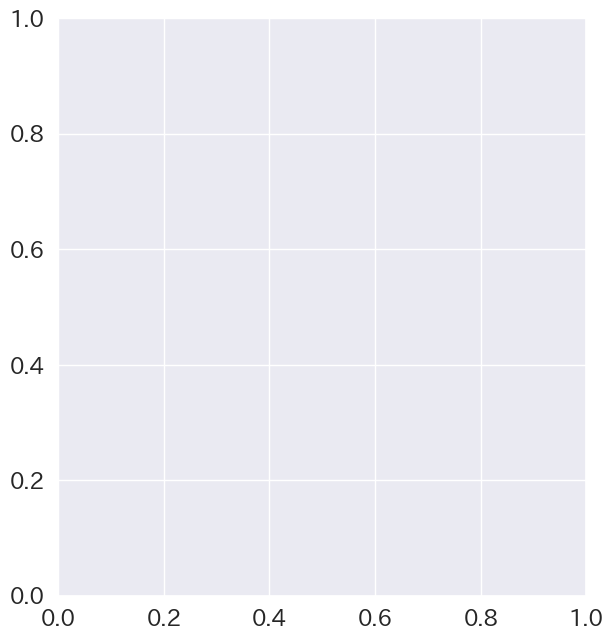

In [10]:
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1);
hittak[hittak['発生時（始期）'] == '0'].hittak['市区町村（発生地）'].plot(kind='pie',startangle=90,autopct='%1.1f%%');
plt.legend(loc=3,fontsize=10)
plt.ylabel('')
plt.title('Death due to direct smoking',fontweight="bold",fontsize = 20)
plt.axis('equal')